In [8]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from keras.layers import  BatchNormalization, LeakyReLU, Dropout, Activation

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## System Calls List

In [9]:
syscalls = [
"sys_enter_llistxattr",
"sys_enter_setgroups",
"sys_enter_lremovexattr",
"sys_enter_sethostname",
"sys_enter_accept",
"sys_enter_lseek",
"sys_enter_setitimer",
"sys_enter_accept4",
"sys_enter_lsetxattr",
"sys_enter_setns",
"sys_enter_acct",
"sys_enter_madvise",
"sys_enter_setpgid",
"sys_enter_add_key",
"sys_enter_mbind",
"sys_enter_setpriority",
"sys_enter_adjtimex",
"sys_enter_membarrier",
"sys_enter_setregid",
"sys_enter_personality",
"sys_enter_memfd_create",
"sys_enter_setresgid",
"sys_enter_bind",
"sys_enter_memfd_secret",
"sys_enter_setresuid",
"sys_enter_bpf",
"sys_enter_migrate_pages",
"sys_enter_setreuid",
"sys_enter_brk",
"sys_enter_mincore",
"sys_enter_setrlimit",
"sys_enter_capget",
"sys_enter_mkdirat",
"sys_enter_setsid",
"sys_enter_capset",
"sys_enter_mknodat",
"sys_enter_setsockopt",
"sys_enter_chdir",
"sys_enter_mlock",
"sys_enter_settimeofday",
"sys_enter_chroot",
"sys_enter_mlock2",
"sys_enter_setuid",
"sys_enter_clock_adjtime",
"sys_enter_mlockall",
"sys_enter_setxattr",
"sys_enter_clock_getres",
"sys_enter_mmap",
"sys_enter_shmat",
"sys_enter_clock_gettime",
"sys_enter_mount",
"sys_enter_shmctl",
"sys_enter_clock_nanosleep",
"sys_enter_mount_setattr",
"sys_enter_shmdt",
"sys_enter_clock_settime",
"sys_enter_move_mount",
"sys_enter_shmget",
"sys_enter_clone",
"sys_enter_move_pages",
"sys_enter_shutdown",
"sys_enter_clone3",
"sys_enter_mprotect",
"sys_enter_sigaltstack",
"sys_enter_close",
"sys_enter_mq_getsetattr",
"sys_enter_signalfd4",
"sys_enter_close_range",
"sys_enter_mq_notify",
"sys_enter_socket",
"sys_enter_connect",
"sys_enter_mq_open",
"sys_enter_socketpair",
"sys_enter_copy_file_range",
"sys_enter_mq_timedreceive",
"sys_enter_splice",
"sys_enter_delete_module",
"sys_enter_mq_timedsend",
"sys_enter_statfs",
"sys_enter_dup",
"sys_enter_mq_unlink",
"sys_enter_statx",
"sys_enter_dup3",
"sys_enter_mremap",
"sys_enter_swapoff",
"sys_enter_epoll_create1",
"sys_enter_msgctl",
"sys_enter_swapon",
"sys_enter_epoll_ctl",
"sys_enter_msgget",
"sys_enter_symlinkat",
"sys_enter_epoll_pwait",
"sys_enter_msgrcv",
"sys_enter_sync",
"sys_enter_epoll_pwait2",
"sys_enter_msgsnd",
"sys_enter_sync_file_range",
"sys_enter_eventfd2",
"sys_enter_msync",
"sys_enter_syncfs",
"sys_enter_execve",
"sys_enter_munlock",
"sys_enter_sysinfo",
"sys_enter_execveat",
"sys_enter_munlockall",
"sys_enter_syslog",
"sys_enter_exit",
"sys_enter_munmap",
"sys_enter_tee",
"sys_enter_exit_group",
"sys_enter_name_to_handle_at",
"sys_enter_tgkill",
"sys_enter_faccessat",
"sys_enter_nanosleep",
"sys_enter_timer_create",
"sys_enter_faccessat2",
"sys_enter_newfstat",
"sys_enter_timer_delete",
"sys_enter_fadvise64",
"sys_enter_newfstatat",
"sys_enter_timer_getoverrun",
"sys_enter_fallocate",
"sys_enter_newuname",
"sys_enter_timer_gettime",
"sys_enter_fanotify_init",
"sys_enter_open_by_handle_at",
"sys_enter_timer_settime",
"sys_enter_fanotify_mark",
"sys_enter_open_tree",
"sys_enter_timerfd_create",
"sys_enter_fchdir",
"sys_enter_openat",
"sys_enter_timerfd_gettime",
"sys_enter_fchmod",
"sys_enter_openat2",
"sys_enter_timerfd_settime",
"sys_enter_fchmodat",
"sys_enter_perf_event_open",
"sys_enter_times",
"sys_enter_fchown",
"sys_enter_pidfd_getfd",
"sys_enter_tkill",
"sys_enter_fchownat",
"sys_enter_pidfd_open",
"sys_enter_truncate",
"sys_enter_fcntl",
"sys_enter_pidfd_send_signal",
"sys_enter_umask",
"sys_enter_fdatasync",
"sys_enter_pipe2",
"sys_enter_umount",
"sys_enter_fgetxattr",
"sys_enter_pivot_root",
"sys_enter_unlinkat",
"sys_enter_finit_module",
"sys_enter_ppoll",
"sys_enter_unshare",
"sys_enter_flistxattr",
"sys_enter_prctl",
"sys_enter_userfaultfd",
"sys_enter_flock",
"sys_enter_pread64",
"sys_enter_utimensat",
"sys_enter_fremovexattr",
"sys_enter_preadv",
"sys_enter_vhangup",
"sys_enter_fsconfig",
"sys_enter_preadv2",
"sys_enter_vmsplice",
"sys_enter_fsetxattr",
"sys_enter_prlimit64",
"sys_enter_wait4",
"sys_enter_fsmount",
"sys_enter_process_madvise",
"sys_enter_waitid",
"sys_enter_fsopen",
"sys_enter_process_mrelease",
"sys_enter_write",
"sys_enter_fspick",
"sys_enter_process_vm_readv",
"sys_enter_writev",
"sys_enter_fstatfs",
"sys_enter_process_vm_writev",
"sys_enter_fsync",
"sys_enter_pselect6",
"sys_enter_ftruncate",
"sys_enter_ptrace",
"sys_enter_futex",
"sys_enter_pwrite64",
"sys_enter_get_mempolicy",
"sys_enter_pwritev",
"sys_enter_get_robust_list",
"sys_enter_pwritev2",
"sys_enter_getcpu",
"sys_enter_quotactl",
"sys_enter_getcwd",
"sys_enter_quotactl_fd",
"sys_enter_getdents64",
"sys_enter_read",
"sys_enter_getegid",
"sys_enter_readahead",
"sys_enter_geteuid",
"sys_enter_readlinkat",
"sys_enter_getgid",
"sys_enter_readv",
"sys_enter_getgroups",
"sys_enter_reboot",
"sys_enter_getitimer",
"sys_enter_recvfrom",
"sys_enter_getpeername",
"sys_enter_recvmmsg",
"sys_enter_getpgid",
"sys_enter_recvmsg",
"sys_enter_getpid",
"sys_enter_remap_file_pages",
"sys_enter_getppid",
"sys_enter_removexattr",
"sys_enter_getpriority",
"sys_enter_renameat",
"sys_enter_getrandom",
"sys_enter_renameat2",
"sys_enter_getresgid",
"sys_enter_request_key",
"sys_enter_getresuid",
"sys_enter_restart_syscall",
"sys_enter_getrlimit",
"sys_enter_rseq",
"sys_enter_getrusage",
"sys_enter_rt_sigaction",
"sys_enter_getsid",
"sys_enter_rt_sigpending",
"sys_enter_getsockname",
"sys_enter_rt_sigprocmask",
"sys_enter_getsockopt",
"sys_enter_rt_sigqueueinfo",
"sys_enter_gettid",
"sys_enter_rt_sigreturn",
"sys_enter_gettimeofday",
"sys_enter_rt_sigsuspend",
"sys_enter_getuid",
"sys_enter_rt_sigtimedwait",
"sys_enter_getxattr",
"sys_enter_rt_tgsigqueueinfo",
"sys_enter_init_module",
"sys_enter_sched_get_priority_max",
"sys_enter_inotify_add_watch",
"sys_enter_sched_get_priority_min",
"sys_enter_inotify_init1",
"sys_enter_sched_getaffinity",
"sys_enter_inotify_rm_watch",
"sys_enter_sched_getattr",
"sys_enter_io_cancel",
"sys_enter_sched_getparam",
"sys_enter_io_destroy",
"sys_enter_sched_getscheduler",
"sys_enter_io_getevents",
"sys_enter_sched_rr_get_interval",
"sys_enter_io_pgetevents",
"sys_enter_sched_setaffinity",
"sys_enter_io_setup",
"sys_enter_sched_setattr",
"sys_enter_io_submit",
"sys_enter_sched_setparam",
"sys_enter_io_uring_enter",
"sys_enter_sched_setscheduler",
"sys_enter_io_uring_register",
"sys_enter_sched_yield",
"sys_enter_io_uring_setup",
"sys_enter_seccomp",
"sys_enter_ioctl",
"sys_enter_semctl",
"sys_enter_ioprio_get",
"sys_enter_semget",
"sys_enter_ioprio_set",
"sys_enter_semop",
"sys_enter_kcmp",
"sys_enter_semtimedop",
"sys_enter_kexec_file_load",
"sys_enter_sendfile64",
"sys_enter_kexec_load",
"sys_enter_sendmmsg",
"sys_enter_keyctl",
"sys_enter_sendmsg",
"sys_enter_kill",
"sys_enter_sendto",
"sys_enter_landlock_add_rule",
"sys_enter_set_mempolicy",
"sys_enter_landlock_create_ruleset",
"sys_enter_set_robust_list",
"sys_enter_landlock_restrict_self",
"sys_enter_set_tid_address",
"sys_enter_lgetxattr",
"sys_enter_setdomainname",
"sys_enter_linkat",
"sys_enter_setfsgid",
"sys_enter_listen",
"sys_enter_setfsuid",
"sys_enter_listxattr",
"sys_enter_setgid"
]

## Loading CSV from Desktop

In [10]:
NUM_CLASSES = 2
CLASSES = np.array(['benign', 'malware'])
DATASET_DIR = "dataset/"
WIDTH = 105
HEIGHT = 105
SHAPE = (WIDTH, HEIGHT)
SIZE = WIDTH * HEIGHT * 1

label_encoder = LabelEncoder()
label_encoder.fit(syscalls)

def csvToimage(file_path):
    data = pd.read_csv(file_path)
    data_encoded = label_encoder.fit_transform(data['SYSTEM_CALL'])
    image = np.zeros(SHAPE, dtype=np.uint8)
    syscall_nums = min(len(data_encoded), SIZE)
    image.flat[:syscall_nums] = data_encoded[:syscall_nums]

    return image

def load_data(dataset_dir):
    x = []
    y = []

    classes = [class_name for class_name in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_name))]
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.csv'):
                file_path = os.path.join(class_dir, file_name)
                image = csvToimage(file_path)
                x.append(image)
                y.append(class_idx)
                
    x = np.array(x).reshape(-1, WIDTH, HEIGHT, 1)
    y = np.array(y)
    return x, y

In [11]:
X, y = load_data(DATASET_DIR)

# Image Plotting

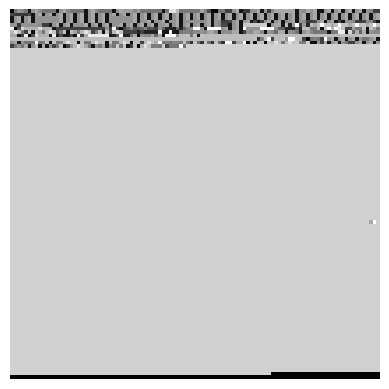

In [12]:

n = 1
nth_image = X[n].reshape(105, 105)

plt.imshow(nth_image, cmap='gray')
plt.axis('off')
plt.show()



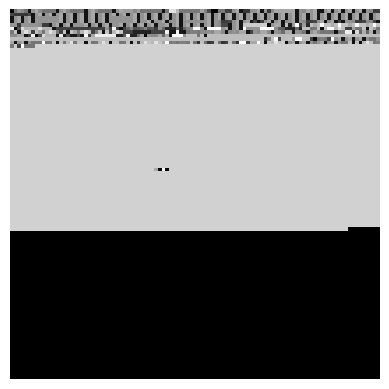

In [13]:
n = 0
nth_image = X[n].reshape(105, 105)

plt.imshow(nth_image, cmap='gray')
plt.axis('off')
plt.show()
